In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pyabc
import time
import os
import tempfile

%matplotlib inline

db_path = ("sqlite:///" +
           os.path.join(tempfile.gettempdir(), "test.db"))


In [2]:
redis_sampler = pyabc.sampler.RedisEvalParallelSampler(host="localhost", port=6379, look_ahead = True)


eps_list=[5, 3, 2, 1, 0.75, 0.5, 0.33, 0.25, 0.2, 0.15]
#eps = pyabc.ListEpsilon(eps_list)
max_nr_pop=5
eps=pyabc.MedianEpsilon(500, median_multiplier=0.8)
min_eps=0.01
pop_size = 16
noise_factor=0.025
iters=250
sleeptime=0.5
noisefactor = 0.4


In [3]:
def model(pars):
    theta = pars['theta1']
    sol = theta**2 + 0.4 * np.random.randn()
    
    # Mimic a model with long runtimes for some parameters
    if theta < 0:
        time.sleep(sleeptime)
            
    return {"X_2": sol}

parameter_prior = pyabc.Distribution(theta1=pyabc.RV("uniform", -2, 4))

def distance(simulation, data):
    return abs(data["X_2"] - simulation["X_2"])


In [4]:
abc = pyabc.ABCSMC(models=model,
        parameter_priors=parameter_prior,
        distance_function=distance,
        population_size=pop_size,
        sampler=redis_sampler,
        eps=eps)

histories=[]
runtimes=np.zeros(iters)
for i in range(iters):
    starttime=time.time()
    abc.new(db_path, {"X_2": 1});
    endtime=time.time()
    h = abc.run(minimum_epsilon=min_eps, max_nr_populations=max_nr_pop)
    histories.append(h)
    runtimes[i]=endtime-starttime

INFO:History:Start <ABCSMC(id=269, start_time=2020-11-19 17:25:30.005052, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.9638020521301853.
INFO:ABC:Preliminary accepted: 12;  Preliminary acceptance rate: 12 / 19 = 6.3158e-01
INFO:ABC:Acceptance rate: 16 / 32 = 5.0000e-01, ESS=1.5873e+01.
INFO:ABC:t: 2, eps: 0.3681035234857526.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 21 = 2.8571e-01
INFO:ABC:Acceptance rate: 16 / 78 = 2.0513e-01, ESS=1.4919e+01.
INFO:ABC:t: 3, eps: 0.18826542632811744.
INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 21 = 1.4286e-01
INFO:ABC:Acceptance rate: 16 / 100 = 1.6000e-01, ESS=1.5325e+01.
INFO:ABC:t: 4, eps: 0.10718067907356453.
INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 21 = 1.4286e-01
INFO:ABC:Acceptance rate: 16 / 312 = 5.1282e-02, ESS=1.5708e+01.
INFO:History:Done <ABCSMC(id=269, start_time=2020-11-19 17:25:3

INFO:ABC:Acceptance rate: 16 / 106 = 1.5094e-01, ESS=1.5244e+01.
INFO:ABC:t: 4, eps: 0.0959420345411014.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 26 = 7.6923e-02
INFO:ABC:Acceptance rate: 16 / 288 = 5.5556e-02, ESS=1.5554e+01.
INFO:History:Done <ABCSMC(id=276, start_time=2020-11-19 17:28:09.798665, end_time=2020-11-19 17:28:28.749925)>
INFO:History:Start <ABCSMC(id=277, start_time=2020-11-19 17:28:28.768990, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.544945991484887.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 53 = 3.0189e-01
INFO:ABC:Preliminary discarded: 4
INFO:ABC:Acceptance rate: 16 / 62 = 2.5806e-01, ESS=1.3336e+01.
INFO:ABC:t: 2, eps: 0.27895533286230495.
INFO:ABC:Preliminary accepted: 9;  Preliminary acceptance rate: 9 / 41 = 2.1951e-01
INFO:ABC:Acceptance rate: 16 / 90 = 1.7778e-01, ESS=9.5340e+00.
INFO:ABC:t: 3, eps: 0.12988164352197715.
INF

INFO:ABC:Acceptance rate: 16 / 181 = 8.8398e-02, ESS=1.5086e+01.
INFO:ABC:t: 3, eps: 0.0479412456674062.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 21 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 445 = 3.5955e-02, ESS=1.4251e+01.
INFO:ABC:t: 4, eps: 0.026953355178865414.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 25 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 967 = 1.6546e-02, ESS=1.5531e+01.
INFO:History:Done <ABCSMC(id=284, start_time=2020-11-19 17:32:26.537487, end_time=2020-11-19 17:33:24.627819)>
INFO:History:Start <ABCSMC(id=285, start_time=2020-11-19 17:33:24.643022, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7153517573204916.
INFO:ABC:Preliminary accepted: 9;  Preliminary acceptance rate: 9 / 24 = 3.7500e-01
INFO:ABC:Acceptance rate: 16 / 47 = 3.4043e-01, ESS=1.5589e+01.
INFO:ABC:t: 2, eps: 0.2845968917074456.
INFO:ABC:Preliminary accepted: 2;  Pr

INFO:History:Start <ABCSMC(id=292, start_time=2020-11-19 17:35:54.606930, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.36578201097618623.
INFO:ABC:Preliminary accepted: 7;  Preliminary acceptance rate: 7 / 31 = 2.2581e-01
INFO:ABC:Acceptance rate: 16 / 84 = 1.9048e-01, ESS=1.4557e+01.
INFO:ABC:t: 2, eps: 0.16069873468515536.
INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 19 = 1.5789e-01
INFO:ABC:Acceptance rate: 16 / 164 = 9.7561e-02, ESS=1.2255e+01.
INFO:ABC:t: 3, eps: 0.07331665346447816.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 13 = 7.6923e-02
INFO:ABC:Acceptance rate: 16 / 204 = 7.8431e-02, ESS=1.2453e+01.
INFO:ABC:t: 4, eps: 0.0313591359552684.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 40 = 2.5000e-02
INFO:ABC:Acceptance rate: 16 / 575 = 2.7826e-02, ESS=1.1947e+01.
INFO:History:Done <ABCSMC(id=292, start_time=2020-11-19 17:35:5

INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 20 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 468 = 3.4188e-02, ESS=1.5250e+01.
INFO:History:Done <ABCSMC(id=299, start_time=2020-11-19 17:39:01.860147, end_time=2020-11-19 17:39:26.919847)>
INFO:History:Start <ABCSMC(id=300, start_time=2020-11-19 17:39:26.935918, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6753024759813403.
INFO:ABC:Preliminary accepted: 14;  Preliminary acceptance rate: 14 / 34 = 4.1176e-01
INFO:ABC:Preliminary discarded: 1
INFO:ABC:Acceptance rate: 16 / 45 = 3.5556e-01, ESS=1.4132e+01.
INFO:ABC:t: 2, eps: 0.2695127657028303.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 30 = 2.0000e-01
INFO:ABC:Acceptance rate: 16 / 76 = 2.1053e-01, ESS=1.4555e+01.
INFO:ABC:t: 3, eps: 0.13042321795837472.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 18 = 5.5556e-02
INFO:ABC:Acceptance rate

INFO:ABC:Acceptance rate: 16 / 37 = 4.3243e-01, ESS=1.2714e+01.
INFO:ABC:t: 2, eps: 0.39473686397360713.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 24 = 2.5000e-01
INFO:ABC:Acceptance rate: 16 / 66 = 2.4242e-01, ESS=1.4931e+01.
INFO:ABC:t: 3, eps: 0.13073920737400965.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 29 = 2.0690e-01
INFO:ABC:Acceptance rate: 16 / 139 = 1.1511e-01, ESS=1.5517e+01.
INFO:ABC:t: 4, eps: 0.0390401507881116.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 27 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 414 = 3.8647e-02, ESS=1.3180e+01.
INFO:History:Done <ABCSMC(id=307, start_time=2020-11-19 17:43:33.755191, end_time=2020-11-19 17:44:01.288633)>
INFO:History:Start <ABCSMC(id=308, start_time=2020-11-19 17:44:01.303844, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6743932325977504.
INFO:ABC:Preliminary accepted: 16;  Pr

INFO:History:Start <ABCSMC(id=315, start_time=2020-11-19 17:46:50.432136, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.941903402773999.
INFO:ABC:Preliminary accepted: 15;  Preliminary acceptance rate: 15 / 20 = 7.5000e-01
INFO:ABC:Preliminary discarded: 1
INFO:ABC:Acceptance rate: 16 / 28 = 5.7143e-01, ESS=1.5955e+01.
INFO:ABC:t: 2, eps: 0.390972148766692.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 22 = 2.7273e-01
INFO:ABC:Acceptance rate: 16 / 67 = 2.3881e-01, ESS=1.5636e+01.
INFO:ABC:t: 3, eps: 0.1564942760389409.
INFO:ABC:Preliminary accepted: 8;  Preliminary acceptance rate: 8 / 36 = 2.2222e-01
INFO:ABC:Acceptance rate: 16 / 110 = 1.4545e-01, ESS=1.5200e+01.
INFO:ABC:t: 4, eps: 0.06512312627228321.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 26 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 383 = 4.1775e-02, ESS=1.5450e+01.
INFO:History:Done <ABCSMC(id=315

INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 22 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 824 = 1.9417e-02, ESS=1.4575e+01.
INFO:History:Done <ABCSMC(id=322, start_time=2020-11-19 17:49:38.326224, end_time=2020-11-19 17:50:31.641610)>
INFO:History:Start <ABCSMC(id=323, start_time=2020-11-19 17:50:31.657164, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.9008853883699364.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 26 = 6.1538e-01
INFO:ABC:Preliminary discarded: 11
INFO:ABC:Acceptance rate: 16 / 44 = 3.6364e-01, ESS=1.5031e+01.
INFO:ABC:t: 2, eps: 0.3370488773052797.
INFO:ABC:Preliminary accepted: 7;  Preliminary acceptance rate: 7 / 35 = 2.0000e-01
INFO:ABC:Acceptance rate: 16 / 90 = 1.7778e-01, ESS=5.3983e+00.
INFO:ABC:t: 3, eps: 0.11169879038123615.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 12 = 8.3333e-02
INFO:ABC:Acceptance rat

INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 26 = 1.1538e-01
INFO:ABC:Acceptance rate: 16 / 102 = 1.5686e-01, ESS=1.5663e+01.
INFO:ABC:t: 3, eps: 0.09354971745744162.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 21 = 4.7619e-02
INFO:ABC:Acceptance rate: 16 / 274 = 5.8394e-02, ESS=1.4950e+01.
INFO:ABC:t: 4, eps: 0.035729867405384995.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 13 = 7.6923e-02
INFO:ABC:Acceptance rate: 16 / 776 = 2.0619e-02, ESS=1.5733e+01.
INFO:History:Done <ABCSMC(id=330, start_time=2020-11-19 17:54:01.620330, end_time=2020-11-19 17:54:41.836745)>
INFO:History:Start <ABCSMC(id=331, start_time=2020-11-19 17:54:41.852678, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7751324665882926.
INFO:ABC:Preliminary accepted: 14;  Preliminary acceptance rate: 14 / 22 = 6.3636e-01
INFO:ABC:Acceptance rate: 16 / 37 = 4.3243e-01, ESS=1.

INFO:ABC:Acceptance rate: 16 / 894 = 1.7897e-02, ESS=1.4460e+01.
INFO:History:Done <ABCSMC(id=337, start_time=2020-11-19 17:56:29.527788, end_time=2020-11-19 17:56:33.265230)>
INFO:History:Start <ABCSMC(id=338, start_time=2020-11-19 17:56:33.281267, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.9044215895519468.
INFO:ABC:Preliminary accepted: 15;  Preliminary acceptance rate: 15 / 26 = 5.7692e-01
INFO:ABC:Preliminary discarded: 1
INFO:ABC:Acceptance rate: 16 / 35 = 4.5714e-01, ESS=1.5251e+01.
INFO:ABC:t: 2, eps: 0.3678424909761602.
INFO:ABC:Preliminary accepted: 11;  Preliminary acceptance rate: 11 / 29 = 3.7931e-01
INFO:ABC:Acceptance rate: 16 / 65 = 2.4615e-01, ESS=1.5223e+01.
INFO:ABC:t: 3, eps: 0.17743892793243746.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 12 = 1.6667e-01
INFO:ABC:Acceptance rate: 16 / 106 = 1.5094e-01, ESS=1.5612e+01.
INFO:ABC:t: 4, eps: 0.05859453113465676.


INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 29 = 6.8966e-02
INFO:ABC:Acceptance rate: 16 / 160 = 1.0000e-01, ESS=1.5918e+01.
INFO:ABC:t: 4, eps: 0.06667497026815189.
INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 21 = 1.4286e-01
INFO:ABC:Acceptance rate: 16 / 345 = 4.6377e-02, ESS=1.5100e+01.
INFO:History:Done <ABCSMC(id=345, start_time=2020-11-19 18:00:14.925605, end_time=2020-11-19 18:00:33.429723)>
INFO:History:Start <ABCSMC(id=346, start_time=2020-11-19 18:00:33.453205, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6142745737172834.
INFO:ABC:Preliminary accepted: 13;  Preliminary acceptance rate: 13 / 33 = 3.9394e-01
INFO:ABC:Acceptance rate: 16 / 48 = 3.3333e-01, ESS=1.5201e+01.
INFO:ABC:t: 2, eps: 0.28873430215308393.
INFO:ABC:Preliminary accepted: 8;  Preliminary acceptance rate: 8 / 28 = 2.8571e-01
INFO:ABC:Acceptance rate: 16 / 66 = 2.4242e-01, ESS=1.54

INFO:ABC:Preliminary discarded: 6
INFO:ABC:Acceptance rate: 16 / 75 = 2.1333e-01, ESS=8.4415e+00.
INFO:ABC:t: 2, eps: 0.1876027836030552.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 17 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 132 = 1.2121e-01, ESS=1.5712e+01.
INFO:ABC:t: 3, eps: 0.06476928340311348.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 22 = 4.5455e-02
INFO:ABC:Acceptance rate: 16 / 356 = 4.4944e-02, ESS=1.4077e+01.
INFO:ABC:t: 4, eps: 0.03180554788549347.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 34 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 634 = 2.5237e-02, ESS=1.4942e+01.
INFO:History:Done <ABCSMC(id=353, start_time=2020-11-19 18:03:17.237669, end_time=2020-11-19 18:03:51.428471)>
INFO:History:Start <ABCSMC(id=354, start_time=2020-11-19 18:03:51.445736, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7944293333254994.
INF

INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6606741960262665.
INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 13 = 2.3077e-01
INFO:ABC:Acceptance rate: 16 / 61 = 2.6230e-01, ESS=1.3277e+01.
INFO:ABC:t: 2, eps: 0.2610321108415303.
INFO:ABC:Preliminary accepted: 5;  Preliminary acceptance rate: 5 / 22 = 2.2727e-01
INFO:ABC:Acceptance rate: 16 / 98 = 1.6327e-01, ESS=1.5600e+01.
INFO:ABC:t: 3, eps: 0.0800642048891918.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 30 = 6.6667e-02
INFO:ABC:Acceptance rate: 16 / 464 = 3.4483e-02, ESS=1.4995e+01.
INFO:ABC:t: 4, eps: 0.03015872944522485.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 16 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 761 = 2.1025e-02, ESS=1.2848e+01.
INFO:History:Done <ABCSMC(id=361, start_time=2020-11-19 18:07:25.586795, end_time=2020-11-19 18:08:24.440371)>
INFO:History:Start <ABCSMC(id=362, start_time

INFO:ABC:Acceptance rate: 16 / 994 = 1.6097e-02, ESS=1.5853e+01.
INFO:History:Done <ABCSMC(id=368, start_time=2020-11-19 18:12:51.932691, end_time=2020-11-19 18:13:30.689198)>
INFO:History:Start <ABCSMC(id=369, start_time=2020-11-19 18:13:30.706426, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7176769818910661.
INFO:ABC:Preliminary accepted: 8;  Preliminary acceptance rate: 8 / 30 = 2.6667e-01
INFO:ABC:Acceptance rate: 16 / 61 = 2.6230e-01, ESS=1.5543e+01.
INFO:ABC:t: 2, eps: 0.3573931879267937.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 12 = 1.6667e-01
INFO:ABC:Acceptance rate: 16 / 119 = 1.3445e-01, ESS=1.3453e+01.
INFO:ABC:t: 3, eps: 0.09565873923285696.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 17 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 213 = 7.5117e-02, ESS=1.3270e+01.
INFO:ABC:t: 4, eps: 0.045819370140122495.
INFO:ABC:Preliminary accepted: 0;  P

INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 28 = 1.0714e-01
INFO:ABC:Acceptance rate: 16 / 159 = 1.0063e-01, ESS=1.5022e+01.
INFO:ABC:t: 4, eps: 0.05237333671014904.
INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 27 = 1.1111e-01
INFO:ABC:Acceptance rate: 16 / 439 = 3.6446e-02, ESS=1.5788e+01.
INFO:History:Done <ABCSMC(id=376, start_time=2020-11-19 18:16:58.991530, end_time=2020-11-19 18:17:18.501947)>
INFO:History:Start <ABCSMC(id=377, start_time=2020-11-19 18:17:18.518948, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.5385316357820671.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 37 = 4.3243e-01
INFO:ABC:Preliminary discarded: 1
INFO:ABC:Acceptance rate: 16 / 45 = 3.5556e-01, ESS=1.4440e+01.
INFO:ABC:t: 2, eps: 0.19284937086688397.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 26 = 7.6923e-02
INFO:ABC:Acceptance ra

INFO:ABC:Acceptance rate: 16 / 35 = 4.5714e-01, ESS=1.5936e+01.
INFO:ABC:t: 2, eps: 0.369238224105727.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 19 = 3.1579e-01
INFO:ABC:Acceptance rate: 16 / 81 = 1.9753e-01, ESS=1.0134e+01.
INFO:ABC:t: 3, eps: 0.0928472605259658.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 19 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 258 = 6.2016e-02, ESS=1.2576e+01.
INFO:ABC:t: 4, eps: 0.03645554260494343.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 19 = 5.2632e-02
INFO:ABC:Acceptance rate: 16 / 556 = 2.8777e-02, ESS=1.5230e+01.
INFO:History:Done <ABCSMC(id=384, start_time=2020-11-19 18:21:46.405235, end_time=2020-11-19 18:22:19.054976)>
INFO:History:Start <ABCSMC(id=385, start_time=2020-11-19 18:22:19.072729, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 1.0545639328854168.
INFO:ABC:Preliminary accepted: 14;  Prel

INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.5675030022220843.
INFO:ABC:Preliminary accepted: 9;  Preliminary acceptance rate: 9 / 27 = 3.3333e-01
INFO:ABC:Acceptance rate: 16 / 57 = 2.8070e-01, ESS=1.5459e+01.
INFO:ABC:t: 2, eps: 0.23439653580150377.
INFO:ABC:Preliminary accepted: 7;  Preliminary acceptance rate: 7 / 28 = 2.5000e-01
INFO:ABC:Acceptance rate: 16 / 84 = 1.9048e-01, ESS=1.5936e+01.
INFO:ABC:t: 3, eps: 0.07799583405920395.
INFO:ABC:Preliminary accepted: 4;  Preliminary acceptance rate: 4 / 18 = 2.2222e-01
INFO:ABC:Acceptance rate: 16 / 164 = 9.7561e-02, ESS=1.5752e+01.
INFO:ABC:t: 4, eps: 0.021790869417117612.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 27 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 903 = 1.7719e-02, ESS=1.5835e+01.
INFO:History:Done <ABCSMC(id=392, start_time=2020-11-19 18:27:47.953293, end_time=2020-11-19 18:28:26.851081)>
INFO:History:Start <ABCSMC(id=393, start_t

INFO:ABC:t: 4, eps: 0.02509082553038839.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 558 = 2.8674e-02
INFO:ABC:Preliminary discarded: 7
INFO:ABC:Acceptance rate: 16 / 1016 = 1.5748e-02, ESS=1.0405e+01.
INFO:History:Done <ABCSMC(id=399, start_time=2020-11-19 18:31:29.588603, end_time=2020-11-19 18:31:33.129124)>
INFO:History:Start <ABCSMC(id=400, start_time=2020-11-19 18:31:33.145915, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.5485814944836316.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 26 = 2.3077e-01
INFO:ABC:Acceptance rate: 16 / 56 = 2.8571e-01, ESS=1.5600e+01.
INFO:ABC:t: 2, eps: 0.20463511307882432.
INFO:ABC:Preliminary accepted: 7;  Preliminary acceptance rate: 7 / 29 = 2.4138e-01
INFO:ABC:Acceptance rate: 16 / 111 = 1.4414e-01, ESS=1.5800e+01.
INFO:ABC:t: 3, eps: 0.0748531097694385.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 

INFO:ABC:t: 2, eps: 0.41303690769783946.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 24 = 2.5000e-01
INFO:ABC:Acceptance rate: 16 / 53 = 3.0189e-01, ESS=1.4715e+01.
INFO:ABC:t: 3, eps: 0.19901608228606815.
INFO:ABC:Preliminary accepted: 5;  Preliminary acceptance rate: 5 / 29 = 1.7241e-01
INFO:ABC:Acceptance rate: 16 / 116 = 1.3793e-01, ESS=1.5751e+01.
INFO:ABC:t: 4, eps: 0.09234469311683496.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 23 = 4.3478e-02
INFO:ABC:Acceptance rate: 16 / 204 = 7.8431e-02, ESS=1.4436e+01.
INFO:History:Done <ABCSMC(id=407, start_time=2020-11-19 18:35:33.352359, end_time=2020-11-19 18:35:48.779354)>
INFO:History:Start <ABCSMC(id=408, start_time=2020-11-19 18:35:48.799845, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6591248280263411.
INFO:ABC:Preliminary accepted: 10;  Preliminary acceptance rate: 10 / 23 = 4.3478e-01
INFO:ABC:Accept

INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.5665926417316731.
INFO:ABC:Preliminary accepted: 6;  Preliminary acceptance rate: 6 / 14 = 4.2857e-01
INFO:ABC:Acceptance rate: 16 / 54 = 2.9630e-01, ESS=1.3228e+01.
INFO:ABC:t: 2, eps: 0.17660776052732477.
INFO:ABC:Preliminary accepted: 5;  Preliminary acceptance rate: 5 / 26 = 1.9231e-01
INFO:ABC:Acceptance rate: 16 / 167 = 9.5808e-02, ESS=1.3170e+01.
INFO:ABC:t: 3, eps: 0.0745591917801837.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 20 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 275 = 5.8182e-02, ESS=1.4970e+01.
INFO:ABC:t: 4, eps: 0.023060927532371447.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 26 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 1036 = 1.5444e-02, ESS=1.5847e+01.
INFO:History:Done <ABCSMC(id=415, start_time=2020-11-19 18:38:05.169971, end_time=2020-11-19 18:39:00.588141)>
INFO:History:Start <ABCSMC(id=416, start_

INFO:History:Done <ABCSMC(id=422, start_time=2020-11-19 18:41:49.414284, end_time=2020-11-19 18:42:38.833467)>
INFO:History:Start <ABCSMC(id=423, start_time=2020-11-19 18:42:38.851394, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6953264097388056.
INFO:ABC:Preliminary accepted: 10;  Preliminary acceptance rate: 10 / 21 = 4.7619e-01
INFO:ABC:Acceptance rate: 16 / 49 = 3.2653e-01, ESS=1.5630e+01.
INFO:ABC:t: 2, eps: 0.29701097560892636.
INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 29 = 1.0345e-01
INFO:ABC:Acceptance rate: 16 / 95 = 1.6842e-01, ESS=1.5504e+01.
INFO:ABC:t: 3, eps: 0.1398240578295178.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 12 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 198 = 8.0808e-02, ESS=1.5635e+01.
INFO:ABC:t: 4, eps: 0.04815233882137275.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 27 = 3.7037e-02
INFO:ABC:Acceptan

INFO:ABC:t: 4, eps: 0.040018145635249684.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 21 = 4.7619e-02
INFO:ABC:Acceptance rate: 16 / 478 = 3.3473e-02, ESS=1.5484e+01.
INFO:History:Done <ABCSMC(id=430, start_time=2020-11-19 18:47:02.076202, end_time=2020-11-19 18:47:31.182805)>
INFO:History:Start <ABCSMC(id=431, start_time=2020-11-19 18:47:31.202042, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.8116126322098776.
INFO:ABC:Preliminary accepted: 10;  Preliminary acceptance rate: 10 / 22 = 4.5455e-01
INFO:ABC:Acceptance rate: 16 / 40 = 4.0000e-01, ESS=1.5858e+01.
INFO:ABC:t: 2, eps: 0.3864743321698808.
INFO:ABC:Preliminary accepted: 9;  Preliminary acceptance rate: 9 / 27 = 3.3333e-01
INFO:ABC:Acceptance rate: 16 / 53 = 3.0189e-01, ESS=1.5387e+01.
INFO:ABC:t: 3, eps: 0.15102741725260227.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 18 = 1.1111e-01
INFO:ABC:Accepta

INFO:ABC:Acceptance rate: 16 / 66 = 2.4242e-01, ESS=1.4747e+01.
INFO:ABC:t: 3, eps: 0.09212175609233293.
INFO:ABC:Preliminary accepted: 4;  Preliminary acceptance rate: 4 / 38 = 1.0526e-01
INFO:ABC:Acceptance rate: 16 / 258 = 6.2016e-02, ESS=1.2109e+01.
INFO:ABC:t: 4, eps: 0.035397769058484796.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 33 = 6.0606e-02
INFO:ABC:Acceptance rate: 16 / 632 = 2.5316e-02, ESS=1.5710e+01.
INFO:History:Done <ABCSMC(id=438, start_time=2020-11-19 18:51:09.202585, end_time=2020-11-19 18:51:39.358776)>
INFO:History:Start <ABCSMC(id=439, start_time=2020-11-19 18:51:39.377579, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.8730189245025756.
INFO:ABC:Preliminary accepted: 14;  Preliminary acceptance rate: 14 / 28 = 5.0000e-01
INFO:ABC:Preliminary discarded: 2
INFO:ABC:Acceptance rate: 16 / 38 = 4.2105e-01, ESS=1.3722e+01.
INFO:ABC:t: 2, eps: 0.42249860332551115.


INFO:ABC:t: 1, eps: 0.6857364392527043.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 25 = 6.4000e-01
INFO:ABC:Preliminary discarded: 5
INFO:ABC:Acceptance rate: 16 / 40 = 4.0000e-01, ESS=1.4966e+01.
INFO:ABC:t: 2, eps: 0.21147354527828674.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 20 = 5.0000e-02
INFO:ABC:Acceptance rate: 16 / 116 = 1.3793e-01, ESS=1.5622e+01.
INFO:ABC:t: 3, eps: 0.09847338486701929.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 16 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 286 = 5.5944e-02, ESS=1.3283e+01.
INFO:ABC:t: 4, eps: 0.027555923919744665.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 26 = 3.8462e-02
INFO:ABC:Acceptance rate: 16 / 752 = 2.1277e-02, ESS=1.5497e+01.
INFO:History:Done <ABCSMC(id=446, start_time=2020-11-19 18:55:29.756263, end_time=2020-11-19 18:56:08.478965)>
INFO:History:Start <ABCSMC(id=447, start_time=2020-11-19 18:56:08.498132, end_time=None)>
INFO

INFO:History:Start <ABCSMC(id=454, start_time=2020-11-19 18:59:10.401368, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.8060348540024326.
INFO:ABC:Preliminary accepted: 11;  Preliminary acceptance rate: 11 / 21 = 5.2381e-01
INFO:ABC:Acceptance rate: 16 / 33 = 4.8485e-01, ESS=1.5844e+01.
INFO:ABC:t: 2, eps: 0.42740004004087395.
INFO:ABC:Preliminary accepted: 3;  Preliminary acceptance rate: 3 / 16 = 1.8750e-01
INFO:ABC:Acceptance rate: 16 / 79 = 2.0253e-01, ESS=1.4923e+01.
INFO:ABC:t: 3, eps: 0.21292910753133065.
INFO:ABC:Preliminary accepted: 8;  Preliminary acceptance rate: 8 / 29 = 2.7586e-01
INFO:ABC:Acceptance rate: 16 / 93 = 1.7204e-01, ESS=1.5312e+01.
INFO:ABC:t: 4, eps: 0.07775135506248293.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 35 = 2.8571e-02
INFO:ABC:Acceptance rate: 16 / 280 = 5.7143e-02, ESS=1.5278e+01.
INFO:History:Done <ABCSMC(id=454, start_time=2020-11-19 18:59:1

INFO:ABC:Acceptance rate: 16 / 697 = 2.2956e-02, ESS=1.5940e+01.
INFO:History:Done <ABCSMC(id=461, start_time=2020-11-19 19:04:07.693627, end_time=2020-11-19 19:04:43.390953)>
INFO:History:Start <ABCSMC(id=462, start_time=2020-11-19 19:04:43.410183, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6401543428196537.
INFO:ABC:Preliminary accepted: 15;  Preliminary acceptance rate: 15 / 36 = 4.1667e-01
INFO:ABC:Acceptance rate: 16 / 48 = 3.3333e-01, ESS=1.4281e+01.
INFO:ABC:t: 2, eps: 0.15701230886391904.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 26 = 7.6923e-02
INFO:ABC:Acceptance rate: 16 / 183 = 8.7432e-02, ESS=1.5906e+01.
INFO:ABC:t: 3, eps: 0.038060523366006946.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 21 = 4.7619e-02
INFO:ABC:Acceptance rate: 16 / 696 = 2.2989e-02, ESS=1.5709e+01.
INFO:ABC:t: 4, eps: 0.01887603522571656.
INFO:ABC:Preliminary accepted: 0;

INFO:ABC:Acceptance rate: 16 / 221 = 7.2398e-02, ESS=1.5670e+01.
INFO:ABC:t: 4, eps: 0.014848045627512355.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 24 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 1988 = 8.0483e-03, ESS=1.5838e+01.
INFO:History:Done <ABCSMC(id=469, start_time=2020-11-19 19:09:14.317155, end_time=2020-11-19 19:10:35.513853)>
INFO:History:Start <ABCSMC(id=470, start_time=2020-11-19 19:10:35.533028, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6683610990543974.
INFO:ABC:Preliminary accepted: 15;  Preliminary acceptance rate: 15 / 42 = 3.5714e-01
INFO:ABC:Acceptance rate: 16 / 54 = 2.9630e-01, ESS=1.5383e+01.
INFO:ABC:t: 2, eps: 0.34711812783794266.
INFO:ABC:Preliminary accepted: 5;  Preliminary acceptance rate: 5 / 20 = 2.5000e-01
INFO:ABC:Acceptance rate: 16 / 82 = 1.9512e-01, ESS=1.1479e+01.
INFO:ABC:t: 3, eps: 0.17542711330338154.
INFO:ABC:Preliminary accepted: 3;

INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 55 = 2.9091e-01
INFO:ABC:Preliminary discarded: 42
INFO:ABC:Acceptance rate: 16 / 218 = 7.3394e-02, ESS=1.4951e+01.
INFO:ABC:t: 3, eps: 0.1694446328570952.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 73 = 2.1918e-01
INFO:ABC:Preliminary discarded: 176
INFO:ABC:Acceptance rate: 16 / 914 = 1.7505e-02, ESS=9.7732e+00.
INFO:ABC:t: 4, eps: 0.052582220527496996.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 291 = 5.4983e-02
INFO:ABC:Preliminary discarded: 35
INFO:ABC:Acceptance rate: 16 / 1076 = 1.4870e-02, ESS=1.4966e+01.
INFO:History:Done <ABCSMC(id=477, start_time=2020-11-19 19:14:27.492896, end_time=2020-11-19 19:14:30.629581)>
INFO:History:Start <ABCSMC(id=478, start_time=2020-11-19 19:14:30.647787, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7765461751081404.
INFO:ABC:Preliminary accept

INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.5246932364322942.
INFO:ABC:Preliminary accepted: 8;  Preliminary acceptance rate: 8 / 27 = 2.9630e-01
INFO:ABC:Acceptance rate: 16 / 53 = 3.0189e-01, ESS=1.5821e+01.
INFO:ABC:t: 2, eps: 0.26338989756420567.
INFO:ABC:Preliminary accepted: 5;  Preliminary acceptance rate: 5 / 33 = 1.5152e-01
INFO:ABC:Acceptance rate: 16 / 104 = 1.5385e-01, ESS=1.5565e+01.
INFO:ABC:t: 3, eps: 0.0778498176268832.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 24 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 356 = 4.4944e-02, ESS=1.5933e+01.
INFO:ABC:t: 4, eps: 0.0363168165240067.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 21 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 684 = 2.3392e-02, ESS=1.5209e+01.
INFO:History:Done <ABCSMC(id=485, start_time=2020-11-19 19:18:06.794691, end_time=2020-11-19 19:18:39.051610)>
INFO:History:Start <ABCSMC(id=486, start_tim

INFO:ABC:Acceptance rate: 16 / 918 = 1.7429e-02, ESS=1.0227e+01.
INFO:History:Done <ABCSMC(id=492, start_time=2020-11-19 19:22:15.607372, end_time=2020-11-19 19:22:59.450383)>
INFO:History:Start <ABCSMC(id=493, start_time=2020-11-19 19:22:59.470513, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.5565554792444022.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 37 = 4.3243e-01
INFO:ABC:Preliminary discarded: 37
INFO:ABC:Acceptance rate: 16 / 141 = 1.1348e-01, ESS=2.3220e+00.
INFO:ABC:t: 2, eps: 0.41103188178592476.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 38 = 4.2105e-01
INFO:ABC:Preliminary discarded: 345
INFO:ABC:Acceptance rate: 16 / 925 = 1.7297e-02, ESS=1.4024e+01.
INFO:ABC:t: 3, eps: 0.18666637636253425.
INFO:ABC:Preliminary accepted: 16;  Preliminary acceptance rate: 16 / 84 = 1.9048e-01
INFO:ABC:Preliminary discarded: 188
INFO:ABC:Acceptance rate: 16

INFO:ABC:Acceptance rate: 16 / 76 = 2.1053e-01, ESS=1.3573e+01.
INFO:ABC:t: 3, eps: 0.16070730086256035.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 17 = 5.8824e-02
INFO:ABC:Acceptance rate: 16 / 245 = 6.5306e-02, ESS=1.5840e+01.
INFO:ABC:t: 4, eps: 0.05697075436847321.
INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 18 = 1.1111e-01
INFO:ABC:Acceptance rate: 16 / 310 = 5.1613e-02, ESS=1.5971e+01.
INFO:History:Done <ABCSMC(id=500, start_time=2020-11-19 19:25:40.779192, end_time=2020-11-19 19:26:03.848711)>
INFO:History:Start <ABCSMC(id=501, start_time=2020-11-19 19:26:03.868190, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6640984978295821.
INFO:ABC:Preliminary accepted: 10;  Preliminary acceptance rate: 10 / 24 = 4.1667e-01
INFO:ABC:Acceptance rate: 16 / 48 = 3.3333e-01, ESS=1.5951e+01.
INFO:ABC:t: 2, eps: 0.27766134911157253.
INFO:ABC:Preliminary accepted: 5;  

INFO:ABC:Preliminary accepted: 2;  Preliminary acceptance rate: 2 / 26 = 7.6923e-02
INFO:ABC:Acceptance rate: 16 / 91 = 1.7582e-01, ESS=1.5140e+01.
INFO:ABC:t: 2, eps: 0.11581792103461597.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 30 = 3.3333e-02
INFO:ABC:Acceptance rate: 16 / 202 = 7.9208e-02, ESS=1.3783e+01.
INFO:ABC:t: 3, eps: 0.06255543432491771.
INFO:ABC:Preliminary accepted: 0;  Preliminary acceptance rate: 0 / 23 = 0.0000e+00
INFO:ABC:Acceptance rate: 16 / 471 = 3.3970e-02, ESS=1.5815e+01.
INFO:ABC:t: 4, eps: 0.03331633969988313.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 35 = 2.8571e-02
INFO:ABC:Acceptance rate: 16 / 837 = 1.9116e-02, ESS=1.5039e+01.
INFO:History:Done <ABCSMC(id=508, start_time=2020-11-19 19:29:14.187083, end_time=2020-11-19 19:29:55.003974)>
INFO:History:Start <ABCSMC(id=509, start_time=2020-11-19 19:29:55.032220, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 21 = 7.6190e-01, ESS=1.60

INFO:ABC:Acceptance rate: 16 / 342 = 4.6784e-02, ESS=1.5968e+01.
INFO:History:Done <ABCSMC(id=515, start_time=2020-11-19 19:33:06.806616, end_time=2020-11-19 19:33:29.339160)>
INFO:History:Start <ABCSMC(id=516, start_time=2020-11-19 19:33:29.358185, end_time=None)>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7993286814370616.
INFO:ABC:Preliminary accepted: 14;  Preliminary acceptance rate: 14 / 32 = 4.3750e-01
INFO:ABC:Preliminary discarded: 2
INFO:ABC:Acceptance rate: 16 / 43 = 3.7209e-01, ESS=1.5633e+01.
INFO:ABC:t: 2, eps: 0.3478983913962028.
INFO:ABC:Preliminary accepted: 10;  Preliminary acceptance rate: 10 / 45 = 2.2222e-01
INFO:ABC:Acceptance rate: 16 / 77 = 2.0779e-01, ESS=1.2812e+01.
INFO:ABC:t: 3, eps: 0.10744996246516646.
INFO:ABC:Preliminary accepted: 1;  Preliminary acceptance rate: 1 / 16 = 6.2500e-02
INFO:ABC:Acceptance rate: 16 / 165 = 9.6970e-02, ESS=1.5570e+01.
INFO:ABC:t: 4, eps: 0.03419571159319667.


INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 1.0}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.525}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 1.0}
INFO:root:Best params: {'scaling': 0.525}
INFO:root:Best params: {'scaling': 0.7625}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05

INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scalin

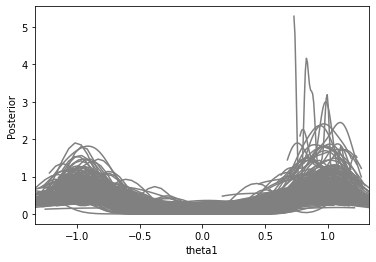

In [5]:
tmax=histories[0].max_t
fig,ax = plt.subplots()

kernel = pyabc.transition.GridSearchCV()

for i in range(iters):
    df,w = histories[i].get_distribution(m=0,t=histories[i].max_t)
    pyabc.visualization.plot_kde_1d(df, w, x='theta1',ax=ax, color='grey', kde = kernel)


In [6]:
t1_quantiles_10 = np.zeros(iters)
t1_medians = np.zeros(iters)
t1_quantiles_90 = np.zeros(iters)
t1_means = np.zeros(iters)
t1_stds = np.zeros(iters)


for i in range(iters):
    df,w= histories[i].get_distribution(m=0,t=histories[i].max_t)
    points = df['theta1'].values
    t1_quantiles_10[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.1)
    t1_medians[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.5)
    t1_quantiles_90[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.9)
    t1_means[i]=pyabc.weighted_statistics.weighted_mean(points,w)
    t1_stds[i]=pyabc.weighted_statistics.weighted_std(points,w)
    
    

allnames=[]
allnames.append("t1_means")
allnames.append("t1_stds")
allnames.append("t1_quantiles_10")
allnames.append("t1_medians")
allnames.append("t1_quantiles_90")

alldata = []
for i in range(len(allnames)):
    alldata.append(eval(allnames[i]))



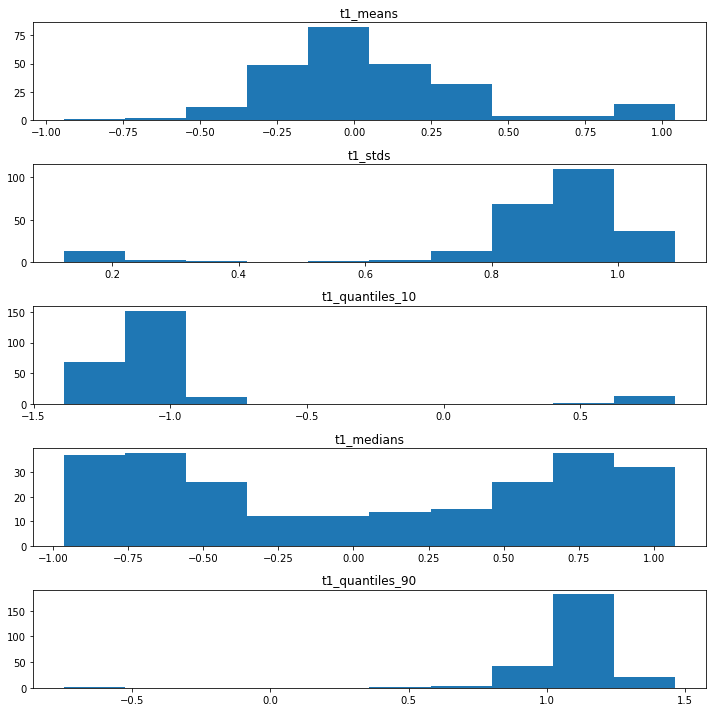

In [7]:
fig = plt.figure(figsize=(10,10))
nx, ny=5, 1

for i in range(nx*ny):
    ax = fig.add_subplot(nx,ny,i+1)
    ax.hist(alldata[i], bins = 10, range=(alldata[i].min(), alldata[i].max()))
    ax.set_title(allnames[i])
    
fig.tight_layout()
